In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston

%matplotlib inline

In [2]:
boston = load_boston()

In [3]:
features = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=['TARGET'])

In [4]:
data = pd.concat([features, target], axis=1)

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [7]:
data2 = data.corr('pearson')

In [8]:
abs(data2.loc['TARGET']).sort_values(ascending=False)

TARGET     1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.385832
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: TARGET, dtype: float64

In [9]:
X = data['LSTAT']
Y = data['TARGET']

In [10]:
X = np.array(X/X.mean())
Y = np.array(Y/Y.mean())

In [11]:
n = int(0.8 * len(X))
print(n)

404


In [12]:
x_train = X[:n]
y_train = Y[:n]

In [13]:
x_test = X[n:]
y_test = Y[n:]

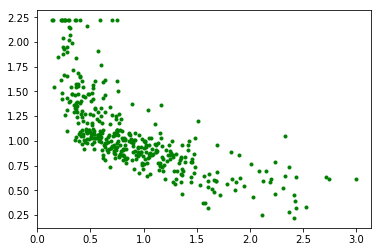

In [14]:
plt.plot(x_train, y_train, 'g.')

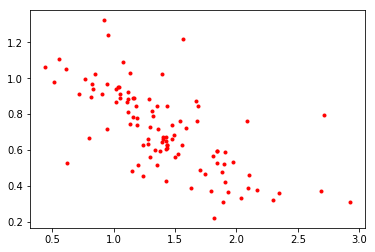

In [15]:
plt.plot(x_test, y_test, 'r.')


In [16]:
def hypothesis(a,b,x):
    return b * np.exp( a * x)

In [17]:
def error(a,b,x,y):
    e = 0
    m = len(y)
    for i in range(m):
        e += np.power((hypothesis(a,b,x[i]) - y[i]), 2)
    
    return (1/(2*m)) * e

In [18]:
def step_gradient(a,b,x,y,learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(x)
    for i in range(m):
        grad_a += 2/m * (hypothesis(a,b,x[i]) - y[i]) * x[i]
        grad_b += 2/m * (hypothesis(a,b,x[i]) - y[i])
    
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    
    return a, b

In [19]:
def descend(initial_a, initial_b, x, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    for i in range(iterations):
        e = error(a, b, x ,y)
        if i % 1000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}")
            
        a, b = step_gradient(a, b, x, y, learning_rate)

    return a, b

In [20]:
a = 0
b = 0
learning_rate = 0.001
iterations = 10000

final_a, final_b = descend(a, b, x_train, y_train, learning_rate, iterations)

Error: 0.6598235512517093, a: 0, b: 0
Error: 0.13777830069690084, a: 0.24018938304856993, b: 0.7605159670194709
Error: 0.09272909040545736, a: 0.029699614445641953, b: 0.9603846303564686
Error: 0.07026586261458007, a: -0.11805937626927067, b: 1.1144846016882277
Error: 0.057781006642446606, a: -0.22488321307871462, b: 1.2371603617467506
Error: 0.050309954371305615, a: -0.3047990894975968, b: 1.3355645212097667
Error: 0.045611905726851504, a: -0.36601791056026645, b: 1.4149625666129624
Error: 0.04254837544275242, a: -0.41371641655018165, b: 1.4793243052749665
Error: 0.0404930756605196, a: -0.45134981580419187, b: 1.5316906963638002
Error: 0.039081454344336054, a: -0.481325504176722, b: 1.5744232647023582


In [21]:
print(error(a,b,x_train,y_train))
print(error(final_a, final_b, x_train, y_train))

0.6598235512517093
0.03809218228861641


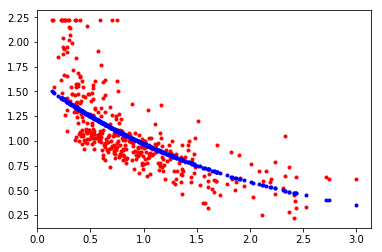

In [22]:
plt.plot(x_train, y_train, 'r.', x_train, hypothesis(final_a, final_b, x_train), 'b.' )

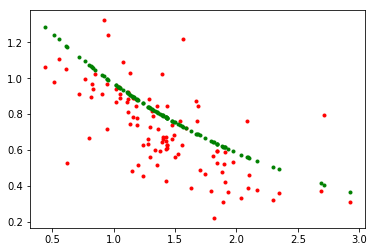

In [23]:
plt.plot(x_test, y_test, 'r.', x_test, hypothesis(final_a, final_b, x_test), 'g.')